In [1]:
#best practices example
# --- 1. Import libraries ---
import duckdb
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px

# --- 2. Load dataset saved previously above from seaborn's GitHub mirror ---
df = duckdb.query("""
    SELECT * FROM read_csv_auto('../data/processed/tips_cleaned.csv')
""").df()


In [2]:
df.info

<bound method DataFrame.info of      bill_total_usd  tip_usd  gender  is_smoker   day    time  party_size  \
0             16.99     1.01  Female      False   Sun  Dinner           2   
1             10.34     1.66    Male      False   Sun  Dinner           3   
2             21.01     3.50    Male      False   Sun  Dinner           3   
3             23.68     3.31    Male      False   Sun  Dinner           2   
4             24.59     3.61  Female      False   Sun  Dinner           4   
..              ...      ...     ...        ...   ...     ...         ...   
239           29.03     5.92    Male      False   Sat  Dinner           3   
240           27.18     2.00  Female       True   Sat  Dinner           2   
241           22.67     2.00    Male       True   Sat  Dinner           2   
242           17.82     1.75    Male      False   Sat  Dinner           2   
243           18.78     3.00  Female      False  Thur  Dinner           2   

      tip_pct  
0    0.059447  
1    0.1605

<Axes: >

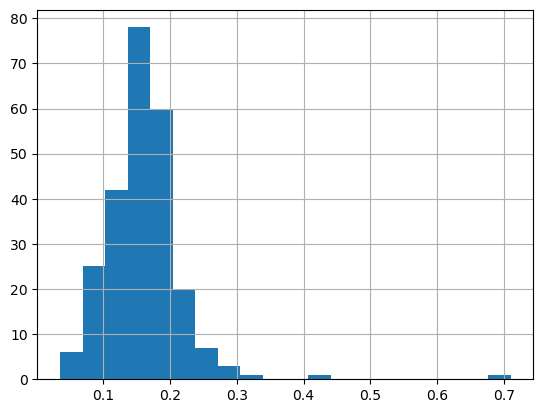

In [3]:
df['tip_pct'].hist(bins=20)

<Axes: title={'center': 'tip_pct'}, xlabel='gender'>

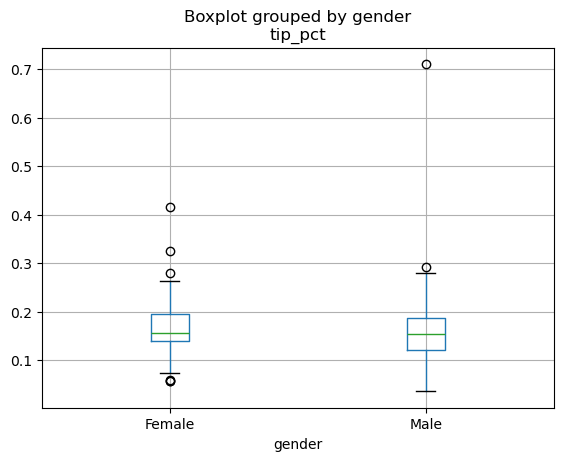

In [4]:
 df.boxplot(column='tip_pct', by='gender')

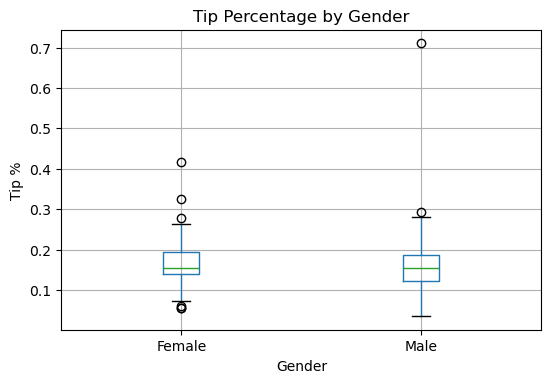

In [15]:
import matplotlib.pyplot as plt

# Create the boxplot
ax = df.boxplot(column='tip_pct', by='gender', figsize=(6, 4))

# Add a title
plt.title("Tip Percentage by Gender")
plt.suptitle("")  # Removes the default pandas subtitle
plt.xlabel("Gender")
plt.ylabel("Tip %")

# Save as JPG
plt.savefig("../reports/figures/tip_pct_by_gender.jpg", format='jpg', dpi=300, bbox_inches='tight')

# Show plot in notebook
plt.show()


<Axes: xlabel='bill_total_usd', ylabel='tip_usd'>

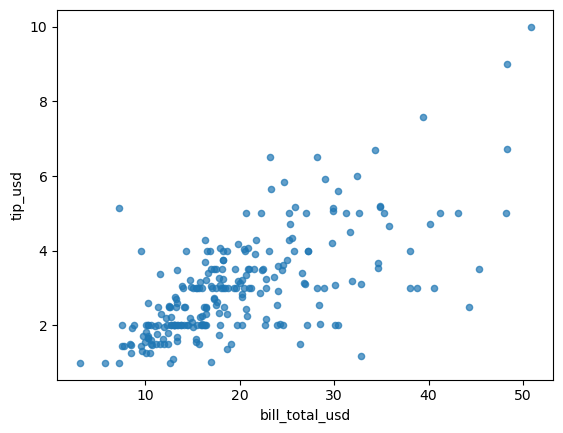

In [5]:
df.plot.scatter(x='bill_total_usd', y='tip_usd', alpha=0.7)

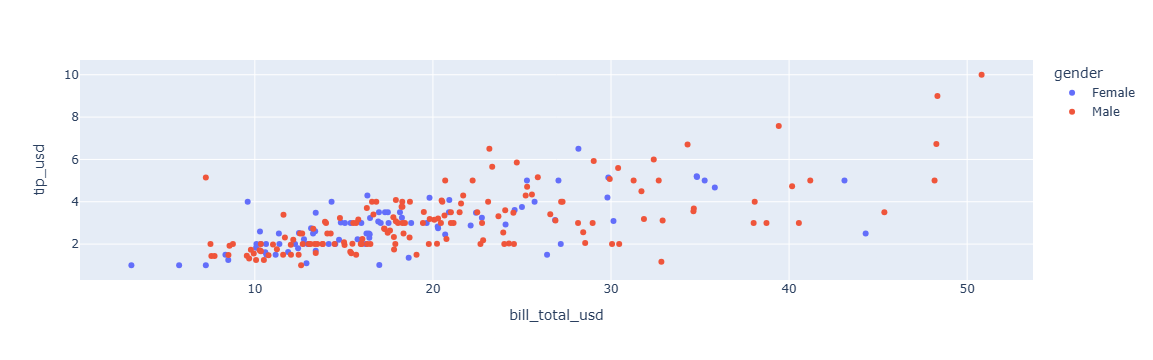

In [10]:
px.scatter(df, x='bill_total_usd', y='tip_usd', color='gender')

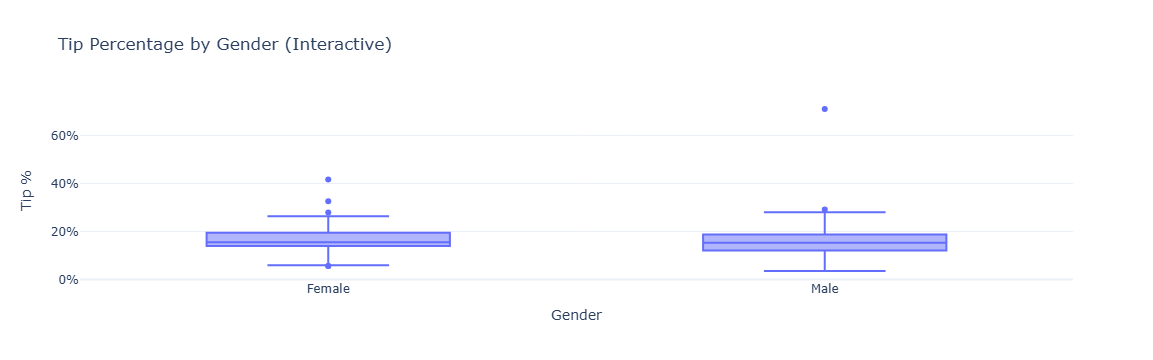

In [3]:
import plotly.express as px
import pandas as pd
import os

# If you already have df in memory, skip this load:
# df = pd.read_csv("../data/processed/tips_cleaned.csv")

# Interactive boxplot (hover to see values, zoom/pan)
fig = px.box(
    df,
    x="gender",
    y="tip_pct",
    points="outliers",          # show outlier points (use "all" to show every point)
    title="Tip Percentage by Gender (Interactive)",
)

# Nice labels + percent formatting
fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Tip %",
    template="plotly_white",
)
fig.update_yaxes(tickformat=".0%")   # show as percent

fig.show()


In [5]:
import kaleido
print("Chrome path:", kaleido.get_chrome_sync())

# Ensure figures folder exists
os.makedirs("../reports/figures", exist_ok=True)

# 1) Save interactive HTML (best for sharing)
fig.write_html("../reports/figures/tip_pct_by_gender_interactive.html")

# 2) Save a static PNG/JPG (requires kaleido once)
#   pip install -U kaleido
fig.write_image("../reports/figures/tip_pct_by_gender.png", scale=2)
# or:
# fig.write_image("../reports/figures/tip_pct_by_gender.jpg", scale=2)


Chrome path: /home/rtackett/miniconda3/envs/ds/lib/python3.13/site-packages/choreographer/cli/browser_exe/chrome-linux64/chrome


BrowserDepsError: It seems like you are running a slim version of your operating system and are missing some common dependencies. The following command should install the required dependencies on most systems:

$ sudo apt update && sudo apt-get install libnss3 libatk-bridge2.0-0 libcups2 libxcomposite1 libxdamage1 libxfixes3 libxrandr2 libgbm1 libxkbcommon0 libpango-1.0-0 libcairo2 libasound2

If you have already run the above command and are still seeing this error, or the above command fails, consult the Kaleido documentation for operating system to install chromium dependencies.

For support, run the command `choreo_diagnose` and create an issue with its output.